# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
# import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        return [404, -390, -390, 404]
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 10.                                     # time limit of the episode
init_pose = np.array([5., 5., 5., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([10., 10., 30.])   # initial angle velocities
file_output = 'data.csv'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

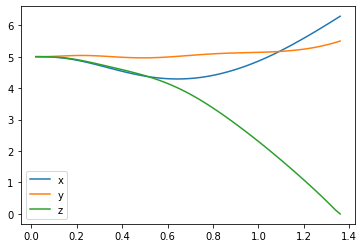

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

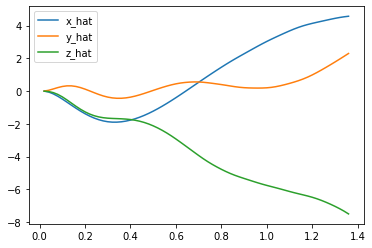

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

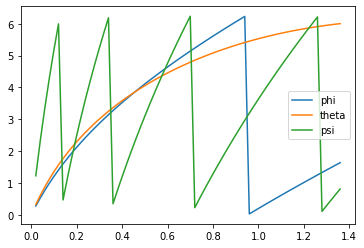

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

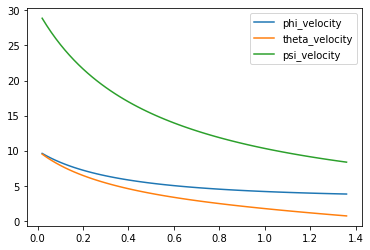

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

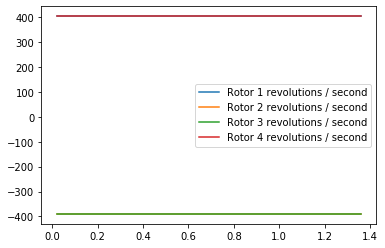

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[6.28587814 5.49720985 0.         1.63935837 6.00187056 0.81360932]
[ 4.56579296  2.2938631  -7.49586679]
[3.81426236 0.69470406 8.3603479 ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
# import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task
import sys

num_episodes = 1000

target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = -2427.880 (best =   0.876), noise_scale = 3.22222

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

### Attention points

(Acquire by Analysis)

- Action space is continuous
- State space is continuous
- Quadcopter stay in the same height if all rotors is running at 404 rot/sec

### DDPG

In [10]:
from task import Task
import tensorflow as tf

from agents.DDPG.score_eval import ScoreEvaluator, print_iteaction
from agents.DDPG.agent import DDPG

init_pose = np.array([5., 5., 5., 0., 0., 0.])
init_velocities = np.array([0., 0., 0.])
init_angle_velocities = np.array([0., 0., 0.])
runtime = 10
target_pos = np.array([10., 10., 30.])

task = Task(init_pose,
            init_velocities,
            init_angle_velocities,
            runtime,
            target_pos)

Using TensorFlow backend.


In [20]:
# garantee reproducibility
np.random.seed(37)
tf.set_random_seed(43)

params = {
  "reg": 0.1,
  "num_nodes": 128,
  "gamma": 0.99,
  "lr": 0.001,
  "tau": 0.001,
  "no_mu": 0.0,
  "no_theta": 0.15,
  "no_sigma": 0.3
}

score_eval = ScoreEvaluator(window=10)

agent = DDPG(task, **params)

num_episodes = 1000

for i in range(num_episodes):
    state = task.reset()
    score = 0

    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)

        agent.step(action, reward, state, done)

        score += reward
        if done:
            score_eval.add(score)
            print_iteaction(i, score_eval)
            break

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

#### Rewards

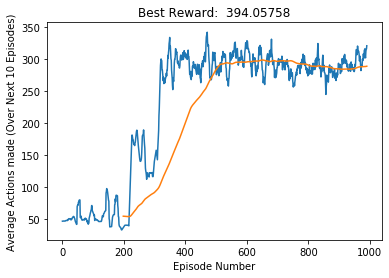

In [21]:
# plotting rewards
score_eval.plot_avg_scores()

#### Position 3D

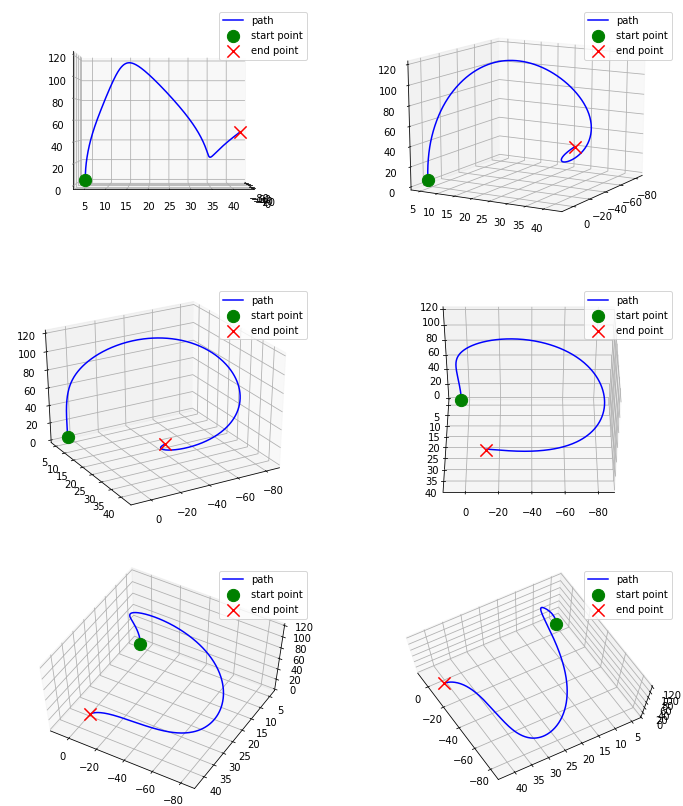

In [29]:
import csv
import numpy as np
from task import Task
from mpl_toolkits.mplot3d import Axes3D


file_output = 'data.csv'

# Setup
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

seed=13
np.random.seed(seed)
tf.set_random_seed(seed) 

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = task.reset()
    while True:
        rotor_speeds = agent.act(state)
        state, _, done = task.step(rotor_speeds)
        to_write = ([task.sim.time]
                    + list(task.sim.pose)
                    + list(task.sim.v)
                    + list(task.sim.angular_v)
                    + list(rotor_speeds))
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break
            
# create a range of angles to vision            
rang = range(0, 180, 30)

# create a figure
fig = plt.figure(figsize=(12, 30))

# split the dimensions
z = results['z']
x = results['x']
y = results['y']

# plotting the position in 3D graphs
for i, angle in enumerate(rang):
    ax = fig.add_subplot(len(rang), 2, i+1, projection='3d')
    ax.scatter(x[0], y[0], z[0],
               c='green', marker='o',
               s=150, label='start point')
    ax.scatter(x[-1], y[-1], z[-1],
               c='red', marker='x',
               s=150, label='end point')
    ax.plot(x, y, z, label='path', c='blue')
    ax.view_init(angle/2, angle)
    ax.legend();

## Reflections

##### **Question 1**: *Describe the task that you specified in `task.py`.  How did you design the reward function?*

The task is, given the initial point, Quadcopter must move to the target point.

I iterated a lot in the reward function. I started with a reward function based only on the distance between the actual point and the target point. After solving the inverted pendulum (from ai-gym), I decided to include a velocity component. This velocity component gives to agent bigger reward based on the less it is moving.

I have also tried an Euclidean distance between the agent and the target, but it does not work as I thought it would, so I stayed with this final version.

given *(x,y,z)* the actual point, *(x_t,y_t,z_t)* the target point and *(x_dot,y_dot,z_dot)* as the velocity vector of the quadcopter in rescpect of x, y and z dimensions respectively, we have the reward function:

$$reward = 1 - 0.003 * (|x - x_{target}| + |y - y_{target}| + |z - z_{target}|) \\ - 0.0003  * (|\dot{x} - 0| + |\dot{y} - 0| + |\dot{z} - 0|) $$

I added the constant to keep the reward positive. I think this is more semantic. 
My only concern it is that reward about velocity is 10% of the reward about the position.

##### **Question 2**: *Discuss your agent briefly, using the following questions as a guide:*

- *What learning algorithm(s) did you try? What worked best for you?*
- *What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?*
- *What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.*

I started with an Agent base on value-function. I had discretized the environment space and the action space, and I tried to solve with Q-Learning algorithm, I tried any bins and Tile codings. Overall, this was the worst approach.
Then, I tried a policy-based method, and I used simulated annealing to find the best policy. I designed a cost function based on the total reward in the episode, but this also was not good.
In both scenarios, I adde replay buffers trying to maximize the learning.
However, truth be told, both approaches give me an excellent random reward function (=/). Moreover, an agent that always falls.

So I left the problem, and following the Udacity advice, I changed to the Inverted Pendulum of Gym (open ai). Also, in this new project, I studied more (using the knowledge acquired on the internet), and I solved using an actor-critic approach, DDPG. My solution about inverted Pendulum could be found in [my Github](https://github.com/BAlmeidaS/reinforcement-learning-studies/blob/master/pendulum/study.ipynb).

So I got back to the problem of Quadcopter, and I implemented the same agent I did in the Pendulum in it. So my life changes =]. A solution started to be drawn. I wrote a module called [grid-search.py](https://github.com/BAlmeidaS/ReinforcementLearning-Quadcopter/blob/master/grid_search.py), which was useful to find the best hyperparameters of the agent. I also used this module to iterate in the reward function. All the files generated by this grid search module could be found in this project [in the folders with prefixes 'weight'](https://github.com/BAlmeidaS/ReinforcementLearning-Quadcopter).

In the end, my NN architecture of my [Actor](https://github.com/BAlmeidaS/ReinforcementLearning-Quadcopter/blob/master/agents/DDPG/actor.py) has 3 dense layers, all having 128 nodes, with a Gaussian Noise of 10 percent, and 0.1 of L2 regularizer factor. For my [Critic](https://github.com/BAlmeidaS/ReinforcementLearning-Quadcopter/blob/master/agents/DDPG/critic.py) NN architecture, I designed with 4 dense layers (with action entering only in the second layer), all having 128 nodes, with 0.1 of L2 regularizer factor. Both of them I am using Adam as the optimizer. In Critic, I am using as loss function MSE, but for Actor I created one, based on the difference of the Actor action and the Critic considered the best action.

##### **Question 3**: *Using the episode rewards plot, discuss how the agent learned over time.*

- *Was it an easy task to learn or hard?*
- *Was there a gradual learning curve, or an aha moment?*
- *How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)*

By far, it was the most challenging project that I ever did in my life in the AI scope. I got stuck for more than 1 week, and I had to read at least 3 papers to understand what I have to do and how I have to do.

The 'aha moment' comes when I understand the actor-critic framework while I was solving [Inverted Pendulum](https://gym.openai.com/envs/Pendulum-v0/). This project was essential for me to solve the quadcopter challenge.

Overall, my final performance was soft good, with the final reward around X.

I am delighted with the final results and very proud of myself to achieve this.


##### **Question 4**: *Briefly summarize your experience working on this project. You can use the following prompts for ideas.*

- *What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)*
- *Did you find anything interesting in how the quadcopter or your agent behaved?*

Like I said before, this is not a simple challenge! Moreover, a real solution to this problem is not a easy task.

In my point of view, this problem is fantastic for two reasons. Besides you have to create the Agent, you also have to define a Task. When I read the problem, and I noticed that I have to design the Task, I was very excited to define crazy tasks like do a loop or a zig-zag drill. However, with this simple task to go from point A to point B, I had to do much work, and I could not imagine how hard it is to solve the crazy tasks that I thought.

Understanding how works critic-agent framework and designing the reward functions, are for sure, the hardest parts of this project.

However, for me, it is magical when I see the first reward function increasing along the time, and I could notice that the Agent is learning. Moreover, when I plot the 3d graph and I see what it is doing and I realize that this makes sense.

This problem is the type of the ones that you scold a lot, that you feel angry, but when you finally solve it, you are passionate about it.
